In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [5]:
df=pd.read_csv("data/FuelConsumption.csv")

In [6]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [7]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<module 'matplotlib.pyplot' from 'c:\\Users\\DeLL\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

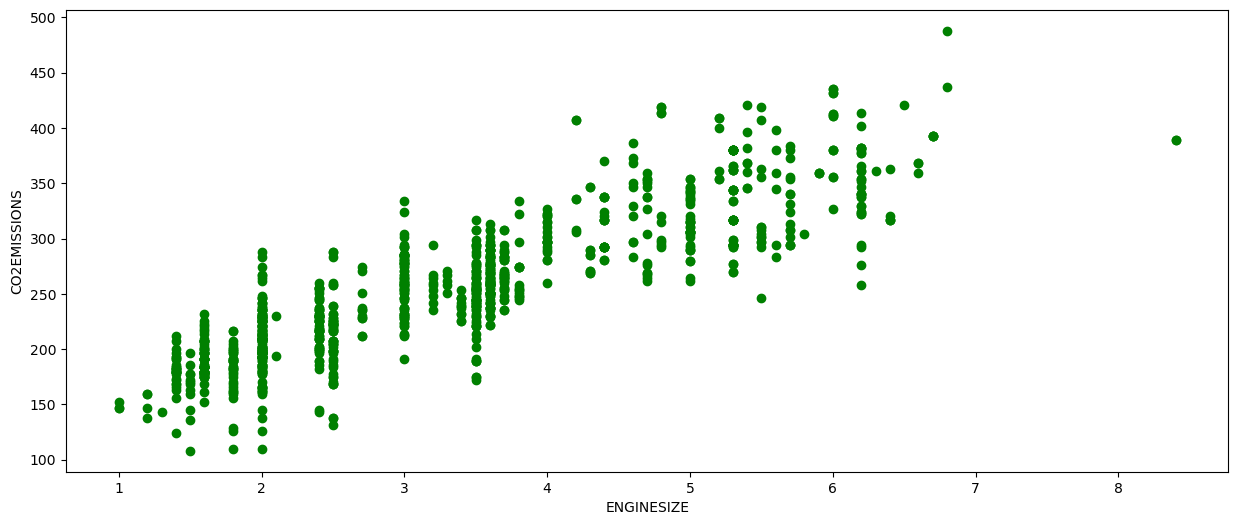

In [32]:
plt.rcParams['figure.figsize']=(15,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt

In [15]:
train, test = train_test_split(df, test_size=0.2)


In [17]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

In [18]:
poly = PolynomialFeatures(degree=2)

In [19]:
train_x_poly = poly.fit_transform(train_x)

In [20]:
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  1.6 ,  2.56],
       ...,
       [ 1.  ,  5.7 , 32.49],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.  ,  4.  ]])

In [21]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [22]:
train_y_ = clf.fit(train_x_poly, train_y)

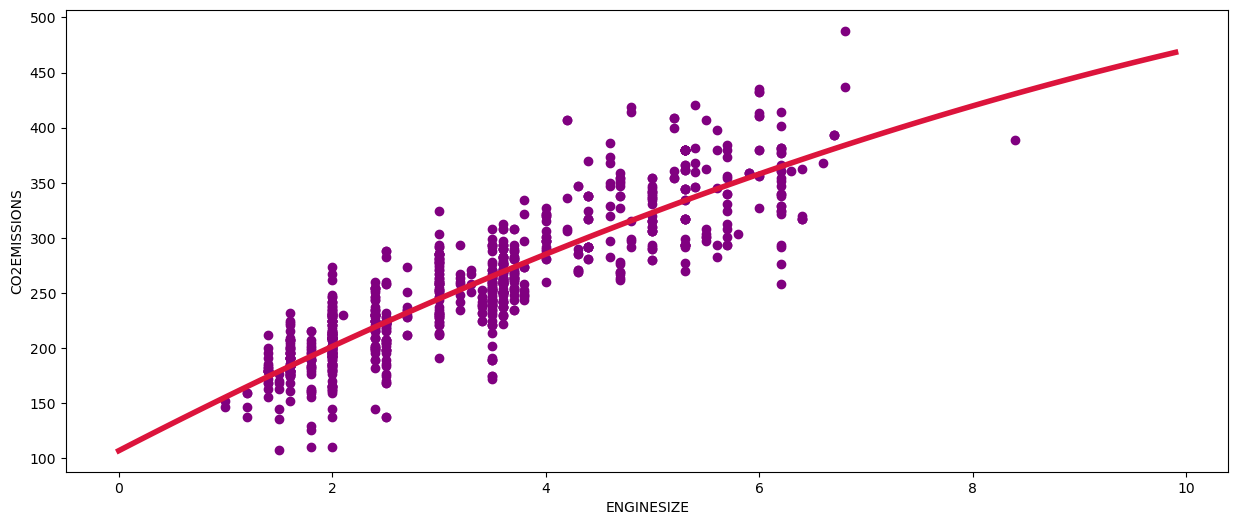

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="purple")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=4)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [27]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[106.95248984 111.94325838 116.90668227 121.84276152 126.75149612
 131.63288609 136.4869314  141.31363208 146.11298811 150.8849995
 155.62966625 160.34698835 165.0369658  169.69959862 174.33488679
 178.94283032 183.5234292  188.07668344 192.60259304 197.10115799
 201.5723783  206.01625397 210.43278499 214.82197137 219.18381311
 223.5183102  227.82546265 232.10527045 236.35773362 240.58285213
 244.78062601 248.95105524 253.09413983 257.20987977 261.29827507
 265.35932573 269.39303175 273.39939312 277.37840984 281.33008193
 285.25440937 289.15139216 293.02103032 296.86332383 300.67827269


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)

MAE:  23.087306193556202
MSE:  909.7168447038533
RMSE:  30.161512639518815
r²:  0.771712133981914
